**Loading a Dataset from the Google Drive to Google Colab**









In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Importing* libraries to read the .csv file

In [10]:
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')
sample1=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')
sample2=pd.read_csv('/content/drive/My Drive/datasetMathAI/sample2.csv')
sample1=sample1.drop('Unnamed: 0', axis=1)
sample2=sample2.drop('Unnamed: 0', axis=1)

In [12]:
df = df.drop_duplicates()

In [13]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
#type of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
df['ca'].unique()
#4 ?????

array([2, 0, 1, 3, 4])

In [16]:
df.loc[df['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [17]:
print(sum(df['ca'] == 4))
#18 rows

4


In [18]:
df['thal'].unique()
#3 ?????

array([3, 2, 1, 0])

In [19]:
print(sum(df['thal'] == 3))
#410 rows

117


In [20]:
#delete rows
df = df[ (df['ca'] != 4) & (df['thal'] != 3)]

In [21]:
df['ca'].unique()

array([3, 0, 2, 1])

In [22]:
df.shape

(183, 14)

In [23]:
#we use this later
#cols_to_scale=['age','trestbps','chol','thalach','oldpeak']
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

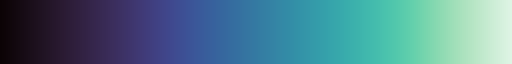

In [25]:
sns.color_palette("mako", as_cmap=True)


In [26]:
sns.set_palette("Paired")

In [27]:
df2 = df[df.isnull()== False]
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Looping through all the features 

features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']

for f in features:
    sns.countplot(x = f, data = df)
    plt.show()

# Looping through all the features by our y variable - see if there is relationship

features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']

for f in features:
    sns.countplot(x = f, data = df, hue = 'target')
    plt.show()

In [28]:
df.duplicated().sum()

0

# **sampling, descriptive statistics**

In [29]:
df['target'].value_counts()

1    134
0     49
Name: target, dtype: int64

In [30]:
import statistics as stats
import math

In [75]:
sample1.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0


In [32]:
#Sampling without Replacement 
#dropping duplicates so there's no biased values and we are left with distinct rows
listVar = ['age','sex','cp','fbs','restecg','exang','slope','ca','thal','trestbps','chol','thalach','oldpeak']
listVarQuant = ['age','trestbps','chol','thalach','oldpeak']
listVarQualt = ['sex','cp','fbs','restecg','exang','slope','ca','thal']


In [33]:
df[listVarQuant].describe()

,age,trestbps,chol,thalach,oldpeak
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,53.748634,129.972678,244.683060,153.256831,0.774317
std,9.586631,16.293473,48.248192,22.768897,0.975776
min,29.000000,94.000000,141.000000,71.000000,0.000000
25%,45.500000,120.000000,209.500000,142.000000,0.000000
50%,54.000000,130.000000,240.000000,158.000000,0.400000
75%,61.000000,140.000000,273.000000,170.000000,1.400000
max,77.000000,180.000000,417.000000,202.000000,4.400000


In [34]:
 #Mesures of variability 
#Standard deviation is useful when comparing the spread of two separate data sets that have approximately the same mean
def populationVariance(data): 
  N = len(data)
  variance = []
  for feature in listVarQuant :
    mean = stats.mean(data[feature])
    deviations = [(x - mean) ** 2 for x in data[feature]]
    variance.append(sum(deviations) / N)
  return variance
def sampleVariance(data): 
  n = len(data)
  variance = []
  for feature in listVarQuant :
    mean = stats.mean(data[feature])
    deviations = [(x - mean) ** 2 for x in data[feature]]
    variance.append(abs(sum(deviations) / n-1))
  return variance
  


In [35]:
df[listVarQuant].describe()

,age,trestbps,chol,thalach,oldpeak
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,53.748634,129.972678,244.683060,153.256831,0.774317
std,9.586631,16.293473,48.248192,22.768897,0.975776
min,29.000000,94.000000,141.000000,71.000000,0.000000
25%,45.500000,120.000000,209.500000,142.000000,0.000000
50%,54.000000,130.000000,240.000000,158.000000,0.400000
75%,61.000000,140.000000,273.000000,170.000000,1.400000
max,77.000000,180.000000,417.000000,202.000000,4.400000


In [36]:
varianceFrame = pd.DataFrame([populationVariance(df),sampleVariance(sample1),
                             sampleVariance(sample2)],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['original dataset','sample1','sample2']
)
varianceFrame

,age,trestbps,chol,thalach,oldpeak
original dataset,91.401296,264.026576,2315.167309,515.589776,0.946936
sample1,90.753100,263.981600,2256.969100,512.589900,0.224544
sample2,76.505100,286.021100,2490.863600,423.541100,0.207800


In [37]:
def stddeviation(Variance):
  stddev = []
  for feature in range(len(Variance)) :
    stddev.append(math.sqrt(Variance[feature]))
  return stddev

In [38]:
stddev0=stddeviation(populationVariance(df))
stddev1=stddeviation(sampleVariance(sample1))
stddev2=stddeviation(sampleVariance(sample2))
stddeviation = pd.DataFrame([stddev0,stddev1,stddev2],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['original dataset','sample1','sample2']
)
stddeviation


,age,trestbps,chol,thalach,oldpeak
original dataset,9.560402,16.248895,48.116186,22.706602,0.973106
sample1,9.526442,16.247511,47.507569,22.640448,0.473861
sample2,8.746719,16.912158,49.908552,20.580114,0.455851


In [39]:
def approxError(population,sample):
  approxError = []
  sumError = 0
  for i in range(len(sample)) :
    sumError += abs(population[i] - sample[i])/population[i]
    approxError.append(str(round(sumError,7))+'%')
  approxError.append(str(round(sumError/5,7))+'%')  
  return approxError


In [40]:
approxError1 = approxError(stddev0,stddev1)
approxError2 = approxError(stddev0,stddev2)
approxError = pd.DataFrame([approxError1,approxError2],
    columns = ['age','trestbps','chol','thalach','oldpeak','general error'],
    index = ['sample1','sample2']
)
approxError

,age,trestbps,chol,thalach,oldpeak,general error
sample1,0.0035522%,0.0036374%,0.0162863%,0.0191997%,0.5322429%,0.1064486%
sample2,0.0851097%,0.1259287%,0.1631795%,0.2568302%,0.788381%,0.1576762%


In [41]:
import math
def coeff_var(variance, data):
  listCoefVar =[]
  for fvar, fmean in zip(range(len(variance)), listVarQuant ):
    coeff_var = math.sqrt(variance[fvar])/stats.mean(data[fmean])*100
    listCoefVar.append(coeff_var)
  return listCoefVar



In [42]:
populationCoeff = coeff_var(populationVariance(df),df)
sample1Coeff = coeff_var(sampleVariance(sample1),sample1)
sample2Coeff = coeff_var(sampleVariance(sample2),sample2)
tableCoefVar = pd.DataFrame([populationCoeff,sample1Coeff,sample2Coeff],
    columns = ['age','trestbps','chol','thalach','oldpeak'],
    index = ['population','sample1','sample2']
)
tableCoefVar

,age,trestbps,chol,thalach,oldpeak
population,17.787247,12.501777,19.664698,14.816046,125.672876
sample1,17.684132,12.567691,19.552854,14.654960,68.875107
sample2,16.525070,13.092946,20.240308,13.262947,67.036890


# **graphes**

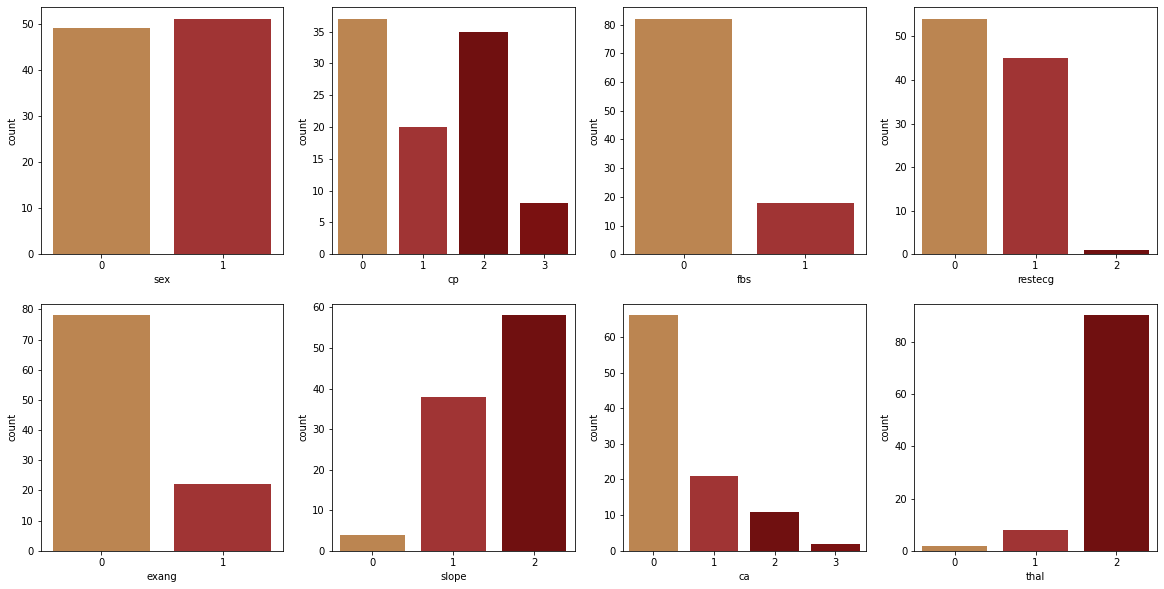

In [46]:
#afficher le nombre d’observations dans chaque colonne catégoriel à l’aide de barres.
fig, ax = plt.subplots(2,4,figsize=(20,10))
l=0
c=0
d=0
for l in range(2):
  for c in range(4):
    sns.countplot(ax=ax[l,c],x=listVarQualt[d], data=sample1,palette=['peru',"firebrick","maroon","darkred"])
    d=d+1
  

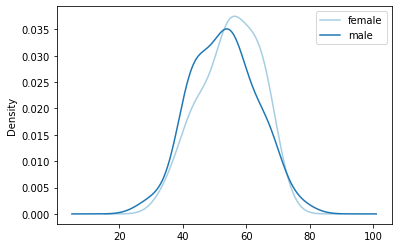

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sample1.groupby('sex').age.plot(kind='kde')
plt.legend(['female','male'])


In [48]:
#df.groupby(['cp']).sum().plot(kind='pie', y='target')

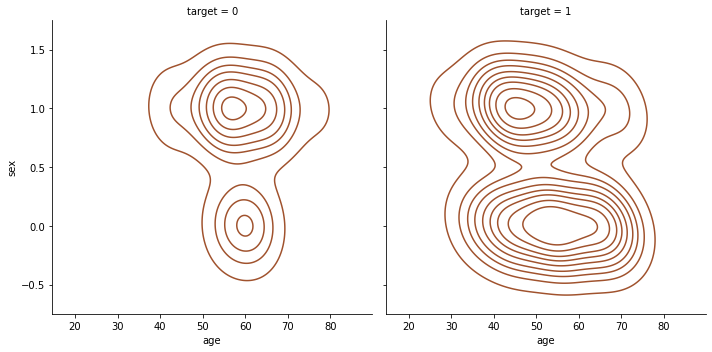

In [49]:
sns.displot(data=sample1, x='age',y='sex',col='target', kind="kde",color='sienna')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

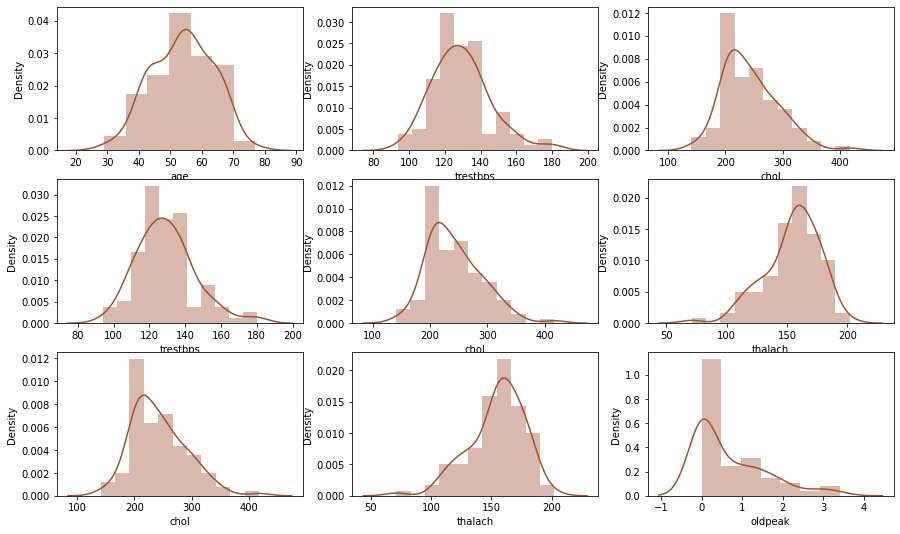

In [51]:
#distribution of each quantative feature in relation with population
rows, cols = 3,3
fig, axarr = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        sns.distplot(sample1[listVarQuant[row+col]], ax=ax,color='sienna')
#normal distribution for: age, trestbps and almost for chol
#oldpeak is left-skewed
#thalac is right-skewed


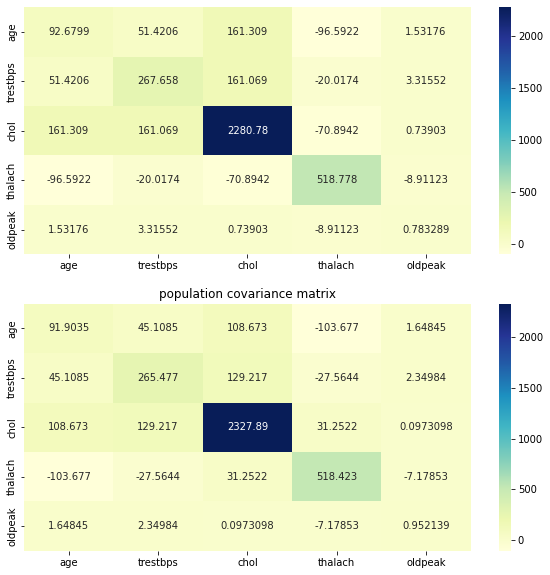

In [52]:
fig, ax = plt.subplots(2,1,figsize=(10,10)) 
#covariance matrix
cov=sample1[listVarQuant].cov()
#, print(cov)
sns.heatmap(cov, annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu',ax=ax[0])
plt.title('sample covariance matrix')

                                                                         
#population
cov=df[listVarQuant].cov()
sns.heatmap(cov, annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu',ax=ax[1])
plt.title('population covariance matrix')
plt.show()
#np.cov(df['age'],df['trestbps'],df['chol'],df['thalach'],df['oldpeak'])

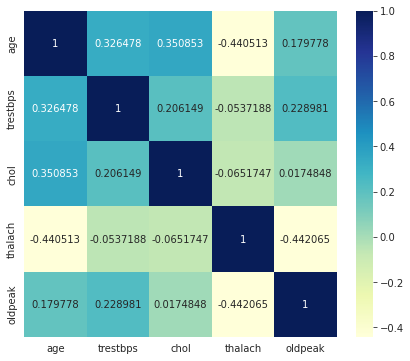

In [97]:
#corr
#coefficient de correlation de Pearson(r)
fig = plt.subplots(figsize=(7,6)) 
sns.heatmap(sample1[listVarQuant].corr(), annot=True, fmt='g', xticklabels=listVarQuant, yticklabels=listVarQuant, cmap='YlGnBu')
plt.show()
#f, ax = plt.subplots(figsize =(9, 8))
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.01)

In [59]:
#low correlation, indépendance lineaire

<AxesSubplot:xlabel='oldpeak', ylabel='thalach'>

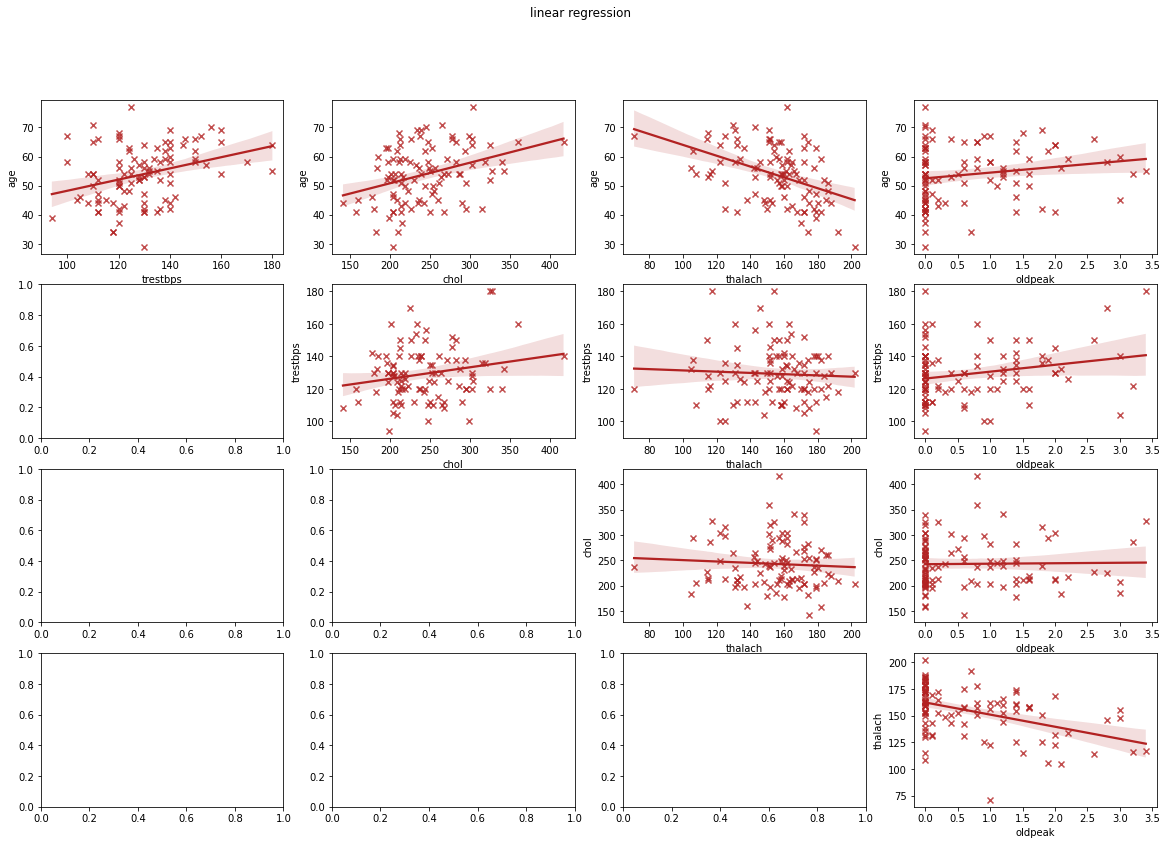

In [60]:
datareg=sample1
fig, ax = plt.subplots(4,4,figsize=(20,13))
fig.suptitle('linear regression')

sns.regplot(ax=ax[0,0],y='age', x='trestbps', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,1],y='age', x='chol', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,2],y='age', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[0,3],y='age', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[1,1],y='trestbps', x='chol', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[1,2],y='trestbps', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[1,3],y='trestbps', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[2,2],y='chol', x='thalach', data=datareg,color='firebrick',marker='x')
sns.regplot(ax=ax[2,3],y='chol', x='oldpeak', data=datareg,color='firebrick',marker='x')

sns.regplot(ax=ax[3,3],y='thalach', x='oldpeak', data=datareg,color='firebrick',marker='x')


#correlation lineaire
#fig, ax = plt.subplots(5,5,figsize=(25,20))
#listVarQuant
#c=0
#d=0
#for f in listVarQuant:
  #for j in listVarQuant[0:(c)]:
    #sns.regplot(ax=ax[c,d], x=f, y=j, data=df, color='firebrick',marker='x')
    #d=d+1
  #c=c+1
  #d=0


In [62]:
colAge=df['age']
colTarget=df['target']

In [63]:
t1=colTarget==1
t0=colTarget==0

In [64]:
t1Age=colAge[t1].dropna()
t0Age=colAge[t0].dropna()

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('age ~ target', data=df).fit()
anovaResult=sm.stats.anova_lm(model, typ=2)
print(anovaResult)


                sum_sq     df          F    PR(>F)
target     1340.585651    1.0  15.770723  0.000103
Residual  15385.851508  181.0        NaN       NaN


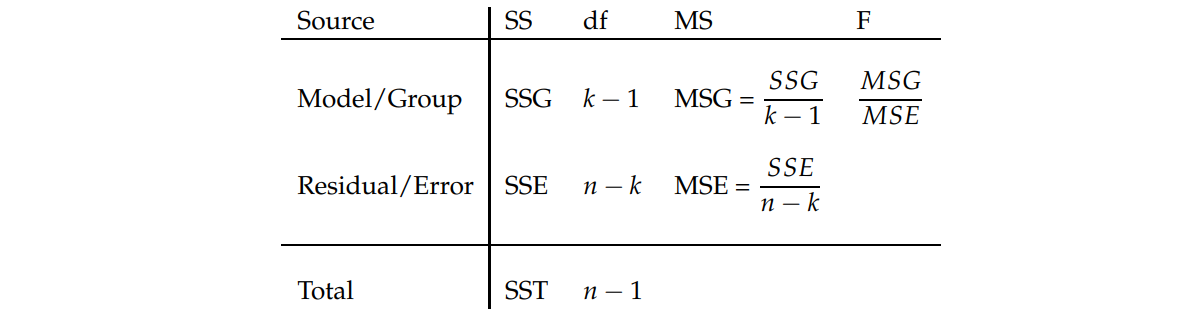

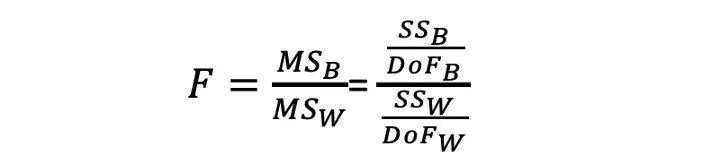

In [68]:

len(sample1[sample1.target == 0]['age'])
len(sample1[sample1.target == 1]['age'])

74

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ C(target)', data=sample1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(target),870.019979,1.0,10.265982,0.001829
Residual,8305.290021,98.0,NaN,NaN


In [76]:
n = len(sample1)
k = len(sample1['target'].unique())
samplesize_target0 =  len(sample1[sample1.target == 0]['age'])
samplesize_target1 =  len(sample1[sample1.target == 1]['age'])
# Calculate Means 
mean_target0 = sample1[sample1.target == 0]['age'].mean()
mean_target1 = sample1[sample1.target == 1]['age'].mean()
mean_overall = sample1['age'].mean()

# Calculate Variances 
var_target0 = sample1[sample1.target == 0]['age'].var()
var_target1 = sample1[sample1.target == 1]['age'].var()

# the sum of the squared deviations of the sample averages from the overall average, weighted by the size of the samples
SSG = samplesize_target0 * (mean_overall - mean_target0)**2 + \
      samplesize_target1 *(mean_overall - mean_target1)**2 

#the sum of the squared deviations within samples from the sample averages
SSE = (samplesize_target0 - 1) * var_target0 + \
      (samplesize_target1 - 1) * var_target1 

#total squared deviation (from the average)
SST = SSE + SSG

# Degrees of Freedom 
dof_SSG = k - 1
dof_SSE = n - k
dof_SST = n - 1 
#
MSG = (SSG/dof_SSG)
MSE = (SSE/dof_SSE)

# F Stastics 
f_stat = MSG / MSE

tableAnova_agetarget = pd.DataFrame([[round(SSG,4),dof_SSG,round(MSG,4),f_stat],[SSE,dof_SSE,MSE,''],[SST,n-1,'','']],
    columns = ['SS','df','MS','f-statistic'],
    index = ['Group','Error','Total']
)
tableAnova_agetarget

,SS,df,MS,f-statistic
Group,870.020000,1,870.02,10.265982
Error,8305.290021,98,84.747857,
Total,9175.310000,99,,


https://stattrek.com/online-calculator/f-distribution
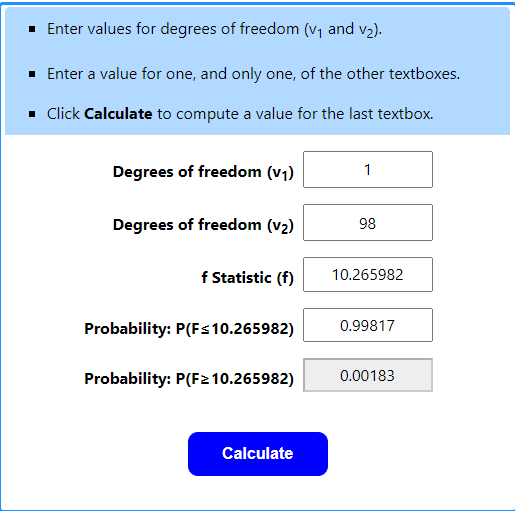

In [77]:
#statistically significant, null hypothesis rejected 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


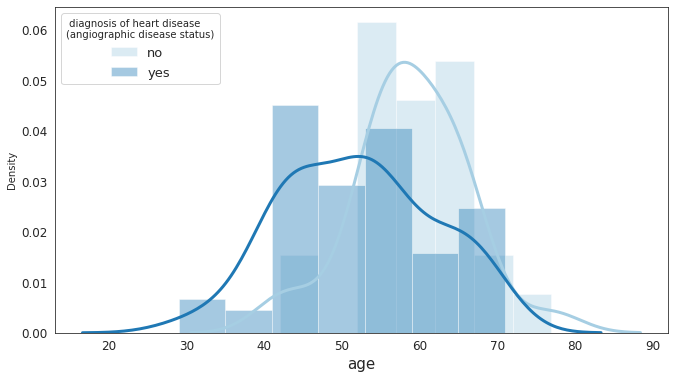

In [78]:
sns.set_style("white")
plt.figure(figsize=(11, 6))
labels=['no','yes']
for num in sample1['target'].unique():
  sns.distplot(sample1[sample1.target == num].age, kde_kws=dict(linewidth=3),label=labels[num])
    
plt.legend(title=' diagnosis of heart disease \n(angiographic disease status)', fontsize=13,loc="upper left")
plt.xlabel('age', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [79]:
cols_to_scale=['age','trestbps','chol','thalach','oldpeak']
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler_data=preprocessing.scale(df[cols_to_scale])

In [80]:
scaler_data
#matrice ((x-u)/v)

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789]])

In [81]:
#prendre 3 variables importante depuis les 5
pca=PCA(n_components=3)
pca.fit(scaler_data)
pca_data=pca.transform(scaler_data)

In [82]:
pca_data

array([[ 0.90733631, -0.20745035, -0.34197451],
       [-0.55323012, -0.77137455, -1.30886872],
       [-2.02281473, -1.32761161, -1.07532513],
       ...,
       [ 0.11264704, -0.92778262,  1.44893113],
       [ 1.33565003, -0.00539986,  1.00254433],
       [-0.35653508, -1.91721191,  0.19347602]])

In [83]:
#features importance
per_var=np.round(pca.explained_variance_ratio_*100, decimals=2)
per_var

array([36.07, 21.51, 17.67])

In [84]:
pcomponnts=['age', 'trestbps', 'chol']

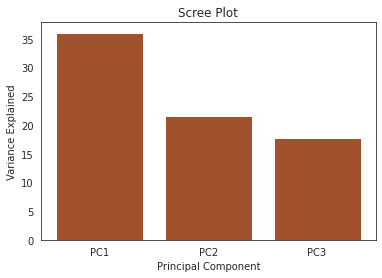

In [85]:
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels,color='sienna' )
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

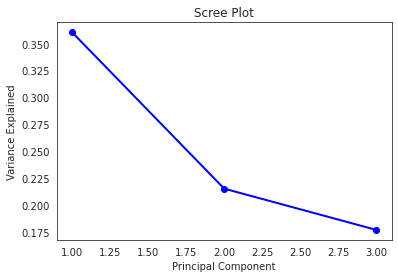

In [86]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [88]:
import plotly.express as px

#df = px.data.df()
fig = px.scatter_matrix(
    pca_data,
    labels=per_var,
    dimensions=(range(3)),
    color=df["target"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/express/_core.py:137: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return args["labels"][column]


In [89]:
cov_matrix=np.matmul(scaler_data.T,scaler_data)
cov_matrix

array([[1025.        ,  277.89944147,  225.31809803, -399.98275191,
         213.34009436],
       [ 277.89944147, 1025.        ,  131.17686333,  -40.24567073,
         192.11995942],
       [ 225.31809803,  131.17686333, 1025.        ,  -22.31639371,
          66.50232287],
       [-399.98275191,  -40.24567073,  -22.31639371, 1025.        ,
        -358.54106722],
       [ 213.34009436,  192.11995942,   66.50232287, -358.54106722,
        1025.        ]])

In [90]:
from scipy.linalg import eigh
values, vectors=eigh(cov_matrix)
values

array([ 490.63523851,  777.68510301,  905.58358494, 1102.41651801,
       1848.67955552])

In [91]:
vectors

array([[ 0.59058536,  0.54197618,  0.16929447, -0.10599462,  0.56353818],
       [-0.33364764,  0.1215011 , -0.73068529, -0.45304542,  0.36710434],
       [-0.18184996, -0.38141055,  0.56182289, -0.66021549,  0.26443738],
       [ 0.63078739, -0.17786813, -0.26299444, -0.49683353, -0.50444085],
       [ 0.33003947, -0.71720863, -0.22940653,  0.31746959,  0.47251606]])

In [92]:
pcs = pd.DataFrame(list(zip(pca_data[:,0], pca_data[:,1], pca_data[:,2], df['target'])),columns =['pc1', 'pc2', 'pc3', 'target']) 
fig = px.scatter_3d(pcs, x='pc1', y='pc2', z='pc3',color='target')
fig.show()